In [1]:
from dotenv import load_dotenv
import os

load_dotenv(verbose=True)
key = os.getenv('OPENAI_API_KEY')

In [7]:
from typing import Annotated, TypedDict
from langgraph.graph.message import add_messages

from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from langchain_openai import ChatOpenAI

In [9]:
class State(TypedDict):                         # State 클래스 정의
    messages: Annotated[list, add_messages]

In [10]:
llm = ChatOpenAI(                               # LLM
    api_key=key,
    model='gpt-4o-mini'
)

In [11]:
def chatbot(state: State):                      # chatbot() 노드 함수
    print('===== chatbot() 노드 실행 =====')
    print(f"state : {state['messages']}")
    answer = llm.invoke(state['messages'])
    print(f"결과: {answer}")
    print('===== chatbot() 노드   끝 =====')

    return {'messages': answer}

In [ ]:
graph = StateGraph(State)                       # State 그래프 생성

In [19]:
graph.add_node('chatbot', chatbot)              # chatbot 노드 추가

In [20]:
graph.add_edge(START, 'chatbot')                # START --> chatbot 노드

In [21]:
graph.add_edge('chatbot', END)                  # chatbot 노드 --> END

In [22]:
app = graph.compile()

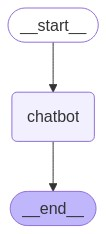

In [23]:
display(Image(app.get_graph().draw_mermaid_png()))

In [24]:
from langchain_core.messages import HumanMessage

message1 = HumanMessage(content='대구 교보문고', id='1')

state = State(messages=[message1])

result = app.invoke(state)

===== chatbot() 노드 실행 =====
state : [HumanMessage(content='대구 교보문고', additional_kwargs={}, response_metadata={}, id='1')]
결과: content='대구 교보문고는 대구광역시에 위치한 대형 서점으로, 다양한 책과 문구류를 판매하는 곳입니다. 이곳은 독서 공간과 카페도 갖추고 있어, 방문객들이 편안하게 책을 읽거나 공부할 수 있는 환경을 제공합니다. 교보문고는 한국 전역에 여러 지점을 두고 있으며, 대구 지점 역시 많은 독자들에게 사랑받고 있습니다. 서적뿐만 아니라 문화 행사나 강연 등도 종종 개최되어 지역 문화 활동의 중심지 역할을 하기도 합니다. 대구 교보문고에 대해 더 궁금한 점이 있으시면 말씀해 주세요!' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 144, 'prompt_tokens': 13, 'total_tokens': 157, 'completion_tokens_details': {'audio_tokens': 0, 'reasoning_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b376dfbbd5', 'finish_reason': 'stop', 'logprobs': None} id='run-b6f6ebf3-100e-46de-bc97-47b93130a4cb-0' usage_metadata={'input_tokens': 13, 'output_tokens': 144, 'total_tokens': 157, 'input_t

In [25]:
print(result)

{'messages': [HumanMessage(content='대구 교보문고', additional_kwargs={}, response_metadata={}, id='1'), AIMessage(content='대구 교보문고는 대구광역시에 위치한 대형 서점으로, 다양한 책과 문구류를 판매하는 곳입니다. 이곳은 독서 공간과 카페도 갖추고 있어, 방문객들이 편안하게 책을 읽거나 공부할 수 있는 환경을 제공합니다. 교보문고는 한국 전역에 여러 지점을 두고 있으며, 대구 지점 역시 많은 독자들에게 사랑받고 있습니다. 서적뿐만 아니라 문화 행사나 강연 등도 종종 개최되어 지역 문화 활동의 중심지 역할을 하기도 합니다. 대구 교보문고에 대해 더 궁금한 점이 있으시면 말씀해 주세요!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 144, 'prompt_tokens': 13, 'total_tokens': 157, 'completion_tokens_details': {'audio_tokens': 0, 'reasoning_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b376dfbbd5', 'finish_reason': 'stop', 'logprobs': None}, id='run-b6f6ebf3-100e-46de-bc97-47b93130a4cb-0', usage_metadata={'input_tokens': 13, 'output_tokens': 144, 'total_tokens': 157, 'input_token_details'